# Assignment-9 Gunjit Mittal
# AI21BTECH11011

## Imports

In [195]:
import numpy as np
import matplotlib.pyplot as plt

## Functions

In [196]:
def f(x): # function to be solved
    return np.array([[np.sin(x[0])**2 + np.exp(x[0]-x[1]) + np.log(x[0]*x[2])],[np.cos(x[0])**2 + np.exp(x[1]-x[2]) + np.log(x[1]*x[2])],[np.sin(x[0])*np.cos(x[0]) + np.exp(x[2]-x[0]) + np.log(x[2]*x[1]*x[0])]]).reshape(3)

def jacobian(x): # jacobian of the function
    return np.array([[np.exp(x[0]-x[1]) + 1/x[0] + np.sin(x[0]*2), -np.exp(x[0]-x[1]), 1/x[2]],[-np.sin(2*x[0]), np.exp(x[1]-x[2]) + 1/x[1], -np.exp(x[1]-x[2])+1/x[2]],[np.cos(2*x[0]) + 1/x[0] - np.exp(x[2]-x[0]), 1/x[1], np.exp(x[2]-x[0])+1/x[2]]])

## Initializations

In [244]:
z = [1.842, 1.342, 1.571] # given measurements
x = [2.65, 6.21, 0.52] # initial guess
epsilon = 1e-6
error = []
pred_states = []
pred_states.append(x)
measurement = list(z)

## Gauss newton method

In [245]:
# Gauss Newton Method
while np.linalg.norm(np.subtract(f(x),z)) > epsilon:
    error.append(np.linalg.norm(np.subtract(f(x),z)))
    jx = jacobian(x)
    dx = np.linalg.solve(np.matmul(jx.T,jx), np.matmul(jx.T,np.subtract(z,f(x))))
    x = x + dx
    pred_states.append(x)
print(x,f(x))

[-0.87555869  0.5404036  -1.9077491 ]
[-0.45823992 -0.95470115 -1.36265688]
[ 0.26660004  0.38681698 -0.50923621]
[ 0.10782437  0.0803301  -0.16976059]
[ 0.00649211 -0.00580972 -0.00354524]
[-1.78064477e-05 -8.78664097e-06  1.28051554e-05]
[1.04710009 1.04703102 1.04706478] [1.842 1.342 1.571]


## Plotting the norm of $f(x)-z$ at each iteration (residual)

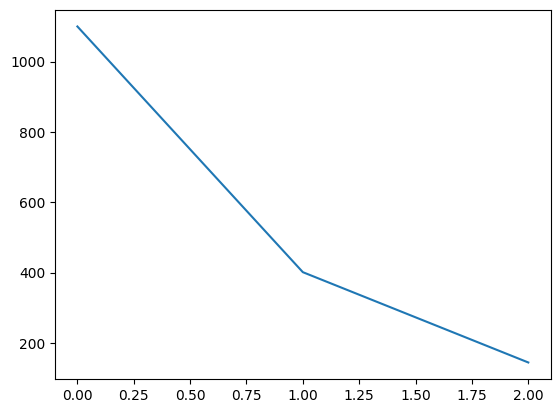

In [199]:
# Plotting |z - f(x)| vs iterations
plt.plot(error)
plt.show()

## Plotting the value of $x$ at each iteration

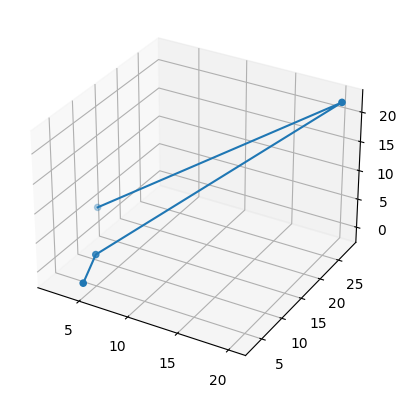

In [200]:
# Plotting the trajectory of the states
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot([i[0] for i in pred_states],[i[1] for i in pred_states],[i[2] for i in pred_states])
ax.scatter([i[0] for i in pred_states],[i[1] for i in pred_states],[i[2] for i in pred_states])
plt.show()

Note: In the above plot the initial point is the one at the left and it converges to the one at bottom-left (can be confirmed by seeing the multiple scatters around that point)